In [1]:
%load_ext autoreload
%autoreload 2

%load_ext line_profiler

#%% Change working directory from the workspace root to the ipynb file location. Turn this addition off with the DataSciece.changeDirOnImportExport setting
import os
try:
    os.chdir(r'C:\Users\kevin\Documents\Workspace\psylit-experiments\src')
    print("Changed cwd:", os.getcwd())
except:
    print("cwd:", os.getcwd())


Changed cwd: C:\Users\kevin\Documents\Workspace\psylit-experiments\src


In [100]:
# General libraries
from IPython.display import display, Markdown, Latex
import os
import sys
import logging
import itertools as it
import functools as ft
import collections as coll
import re
import json
import pathlib
import glob
import math

import scipy as sp
import sklearn as sk
import networkx as nx

import numpy as np
np.random.seed(0)

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 16, 10

import seaborn as sns
sns.set_context("notebook", font_scale=2)
sns.set(rc={'figure.figsize': (16, 10)})
sns.set_style("whitegrid")

import plotly as py
py.offline.init_notebook_mode()

import pandas as pd
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)

logging.basicConfig(level=logging.INFO, stream=sys.stdout)

In [3]:
from experiments.block_entropy import BlockEntropy_StimulusResponse as Experiment
ROOT = pathlib.Path().resolve()
DATA_ROOT = ROOT.parent  / 'data' / 'analytics'
print(ROOT)
print(DATA_ROOT)

Experiment.clear_missing_results(DATA_ROOT)

C:\Users\kevin\Documents\Workspace\psylit-experiments\src
C:\Users\kevin\Documents\Workspace\psylit-experiments\data\analytics


In [4]:
BLOCK_ENT = '$H(k)$'
EXCESS_ENT = '$\eta^{(k)}$'
ENT_RATE = '$h^{(k)}$'

In [60]:
from experiments.block_entropy import BlockEntropy_StimulusResponse as Experiment
ROOT = pathlib.Path().resolve()
DATA_ROOT = ROOT.parent  / 'data' / 'analytics'
print(ROOT)
print(DATA_ROOT)

results = Experiment.load_all_results(DATA_ROOT, run_col_name='Document')
results = results['persubj']
results.pop('Unnamed: 0')
results[BLOCK_ENT] = results.pop('be')
results.head()

C:\Users\kevin\Documents\Workspace\psylit-experiments\src
C:\Users\kevin\Documents\Workspace\psylit-experiments\data\analytics


$H(k)$ Category  Feature  \
  Document                                                                    
0 EN_1771_Mackenzie,Henry_TheManofFeeling_Novel  0.207817    Other  Unknown   
1 EN_1771_Mackenzie,Henry_TheManofFeeling_Novel  0.932323    Other  Unknown   
2 EN_1771_Mackenzie,Henry_TheManofFeeling_Novel  1.761592    Other  Unknown   
3 EN_1771_Mackenzie,Henry_TheManofFeeling_Novel  2.516922    Other  Unknown   
4 EN_1771_Mackenzie,Henry_TheManofFeeling_Novel  3.230813    Other  Unknown   

                                                  Subject   k       n  
  Document                                                             
0 EN_1771_Mackenzie,Henry_TheManofFeeling_Novel  NARRATOR   1  6603.0  
1 EN_1771_Mackenzie,Henry_TheManofFeeling_Novel  NARRATOR   5  6599.0  
2 EN_1771_Mackenzie,Henry_TheManofFeeling_Novel  NARRATOR  10  6594.0  
3 EN_1771_Mackenzie,Henry_TheManofFeeling_Novel  NARRATOR  15  6589.0  
4 EN_1771_Mackenzie,Henry_TheManofFeeling_Novel  NARRATOR  20  6584.0

In [ ]:
# NO NEED ANYMORE

from models.cascades import MultiCascades, FEATURE_TRANSFORMERS
from utils.io import file_parts
from utils.misc import progress

CASC_ROOT = ROOT.parent / 'data' / 'processed' / 'train'
casc_files = list(CASC_ROOT.glob('**/*.csv*'))
print(len(casc_files), 'cascade files')
docs = set(results.index.get_level_values('Document').unique())
print(len(docs), 'docs')
casc_files = [p for p in casc_files if file_parts(p)[0] in docs]
mc = MultiCascades.from_csvs(casc_files, document_col='Document')

In [12]:
mc

neg  \
Subject        t     Document                                             
NARRATOR       2     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel    0   
               6     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel    0   
               39    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel    0   
               45    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel    0   
               58    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel    0   
...                                                                 ...   
mrs. fairfield 30423 EN_1930_Mansfield,Katherine_TheAloe_Novel        0   
               30427 EN_1930_Mansfield,Katherine_TheAloe_Novel        0   
               30434 EN_1930_Mansfield,Katherine_TheAloe_Novel        0   
               30441 EN_1930_Mansfield,Katherine_TheAloe_Novel        0   
               30452 EN_1930_Mansfield,Katherine_TheAloe_Novel        0   

                                                                    L_valence  \
Subject        t     Document                                                   
NARRATOR       2     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel          1   
               6     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel          1   
               39    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel          1   
               45    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel          1   
               58    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel          1   
...                                                                       ...   
mrs. fairfield 30423 EN_1930_Mansfield,Katherine_TheAloe_Novel              1   
               30427 EN_1930_Mansfield,Katherine_TheAloe_Novel              1   
               30434 EN_1930_Mansfield,Katherine_TheAloe_Novel              1   
               30441 EN_1930_Mansfield,Katherine_TheAloe_Novel              1   
               30452 EN_1930_Mansfield,Katherine_TheAloe_Novel              1   

                                                                    L_negative  \
Subject        t     Document                                                    
NARRATOR       2     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel           0   
               6     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel           1   
               39    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel           0   
               45    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel           0   
               58    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel           0   
...                                                                        ...   
mrs. fairfield 30423 EN_1930_Mansfield,Katherine_TheAloe_Novel               1   
               30427 EN_1930_Mansfield,Katherine_TheAloe_Novel               0   
               30434 EN_1930_Mansfield,Katherine_TheAloe_Novel               0   
               30441 EN_1930_Mansfield,Katherine_TheAloe_Novel               0   
               30452 EN_1930_Mansfield,Katherine_TheAloe_Novel               0   

                                                                    L_fear  \
Subject        t     Document                                                
NARRATOR       2     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel       0   
               6     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel       0   
               39    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel       0   
               45    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel       0   
               58    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel       0   
...                                                                    ...   
mrs. fairfield 30423 EN_1930_Mansfield,Katherine_TheAloe_Novel           1   
               30427 EN_1930_Mansfield,Katherine_TheAloe_Novel           0   
               30434 EN_1930_Mansfield,Katherine_TheAloe_Novel           0   
               30441 EN_1930_Mansfield,Katherine_TheAloe_Novel           0   
               30452 EN_1930_Mansfi

In [25]:
# NO NEED ANYMORE

from models.cascades import DaskMultiCascades, FEATURE_TRANSFORMERS
from utils.io import file_parts

CASC_ROOT = ROOT.parent / 'data' / 'processed' / 'train'
casc_files = list(CASC_ROOT.glob('**/*.csv*'))
print(len(casc_files), 'cascade files')
docs = set(results.index.get_level_values('Document').unique())
print(len(docs), 'docs')
casc_files = [p for p in casc_files if file_parts(p)[0] in docs]
dmc = DaskMultiCascades.from_csvs(casc_files, document_col='Document')
dmc

150 cascade files
150 docs


In [38]:
import gc
gc.collect()

914

In [ ]:
# NO NEED ANYMORE
trans = FEATURE_TRANSFORMERS['StimulusResponse']
mcsr = trans(Cascades(mc.casc.sample(frac=.1)), use_dask=False)

mcsr

In [44]:
display(Markdown("""## Average frequency per sample"""))
print(f"{len(mcsr.subjects)} subjects")
print(f"{mcsr.n_rows} data points ({mcsr.n_rows / len(mcsr.subjects)} / subject)")

freq = mcsr.casc.groupby(level=['Document', 'Subject']).sum()
freq.mean()

## Average frequency per sample

923 subjects
4391687 data points (4758.057421451787 / subject)


Category  Feature     
Other     Unknown           63.142574
Response  Anger              3.030363
          Anticipation       5.560396
          Arousal           20.205281
          Disgust            1.891749
          Dominance         33.135974
          Fear               3.758416
          Joy                4.559076
          Sadness            3.711551
          Surprise           3.289109
          Trust              6.114851
          Valence           39.547855
Stimulus  Anger            201.130693
          Anticipation     337.087129
          Arousal         1114.865347
          Disgust          139.404620
          Dominance       1770.312871
          Fear             251.178218
          Joy              282.456766
          Sadness          245.372937
          Surprise         197.912871
          Trust            379.976898
          Valence         2097.005281
dtype: float64

In [61]:
df = results.droplevel(0).set_index(['Subject'], append=True)
#ns = pd.Series(mcsr.casc.groupby(level=['Document', 'Subject']).size(), name='n')
#df = df.merge(ns, how='left', on=['Document', 'Subject'])
df[ENT_RATE] = df[BLOCK_ENT] / df.k
df[EXCESS_ENT] = df[BLOCK_ENT] - df.k * df[ENT_RATE]

#df['n'] = df.groupby(level=[0,1]).size().reset_index()
m = 2
alp_len = 2**m
log_alp_len = math.log(alp_len, 2)
left=df.n * df[BLOCK_ENT]
right=df.k * alp_len ** df.k * log_alp_len

df = df.assign(
    reliability=left.ge(right).replace({True: 'Reliable', False: 'Unreliable'}).astype('category'),
)
reliable = df.reliability == 'Reliable'
df.head()

$H(k)$ Category  \
Document                                      Subject                       
EN_1771_Mackenzie,Henry_TheManofFeeling_Novel NARRATOR  0.207817    Other   
                                              NARRATOR  0.932323    Other   
                                              NARRATOR  1.761592    Other   
                                              NARRATOR  2.516922    Other   
                                              NARRATOR  3.230813    Other   

                                                        Feature   k       n  \
Document                                      Subject                         
EN_1771_Mackenzie,Henry_TheManofFeeling_Novel NARRATOR  Unknown   1  6603.0   
                                              NARRATOR  Unknown   5  6599.0   
                                              NARRATOR  Unknown  10  6594.0   
                                              NARRATOR  Unknown  15  6589.0   
                                              NARRATOR  Unknown  20  6584.0   

                                                        $h^{(k)}$  \
Document                                      Subject               
EN_1771_Mackenzie,Henry_TheManofFeeling_Novel NARRATOR   0.207817   
                                              NARRATOR   0.186465   
                                              NARRATOR   0.176159   
                                              NARRATOR   0.167795   
                                              NARRATOR   0.161541   

                                                        $\eta^{(k)}$  \
Document                                      Subject                  
EN_1771_Mackenzie,Henry_TheManofFeeling_Novel NARRATOR  0.000000e+00   
                                              NARRATOR -1.110223e-16   
                                              NARRATOR -2.220446e-16   
                                              NARRATOR  0.000000e+00   
                                              NARRATOR  0.000000e+00   

                                                       reliability  
Document                                      Subject               
EN_1771_Mackenzie,Henry_TheManofFeeling_Novel NARRATOR    Reliable  
                                              NARRATOR  Unreliable  
                                              NARRATOR  Unreliable  
                                              NARRATOR  Unreliable  
                                              NARRATOR  Unreliable

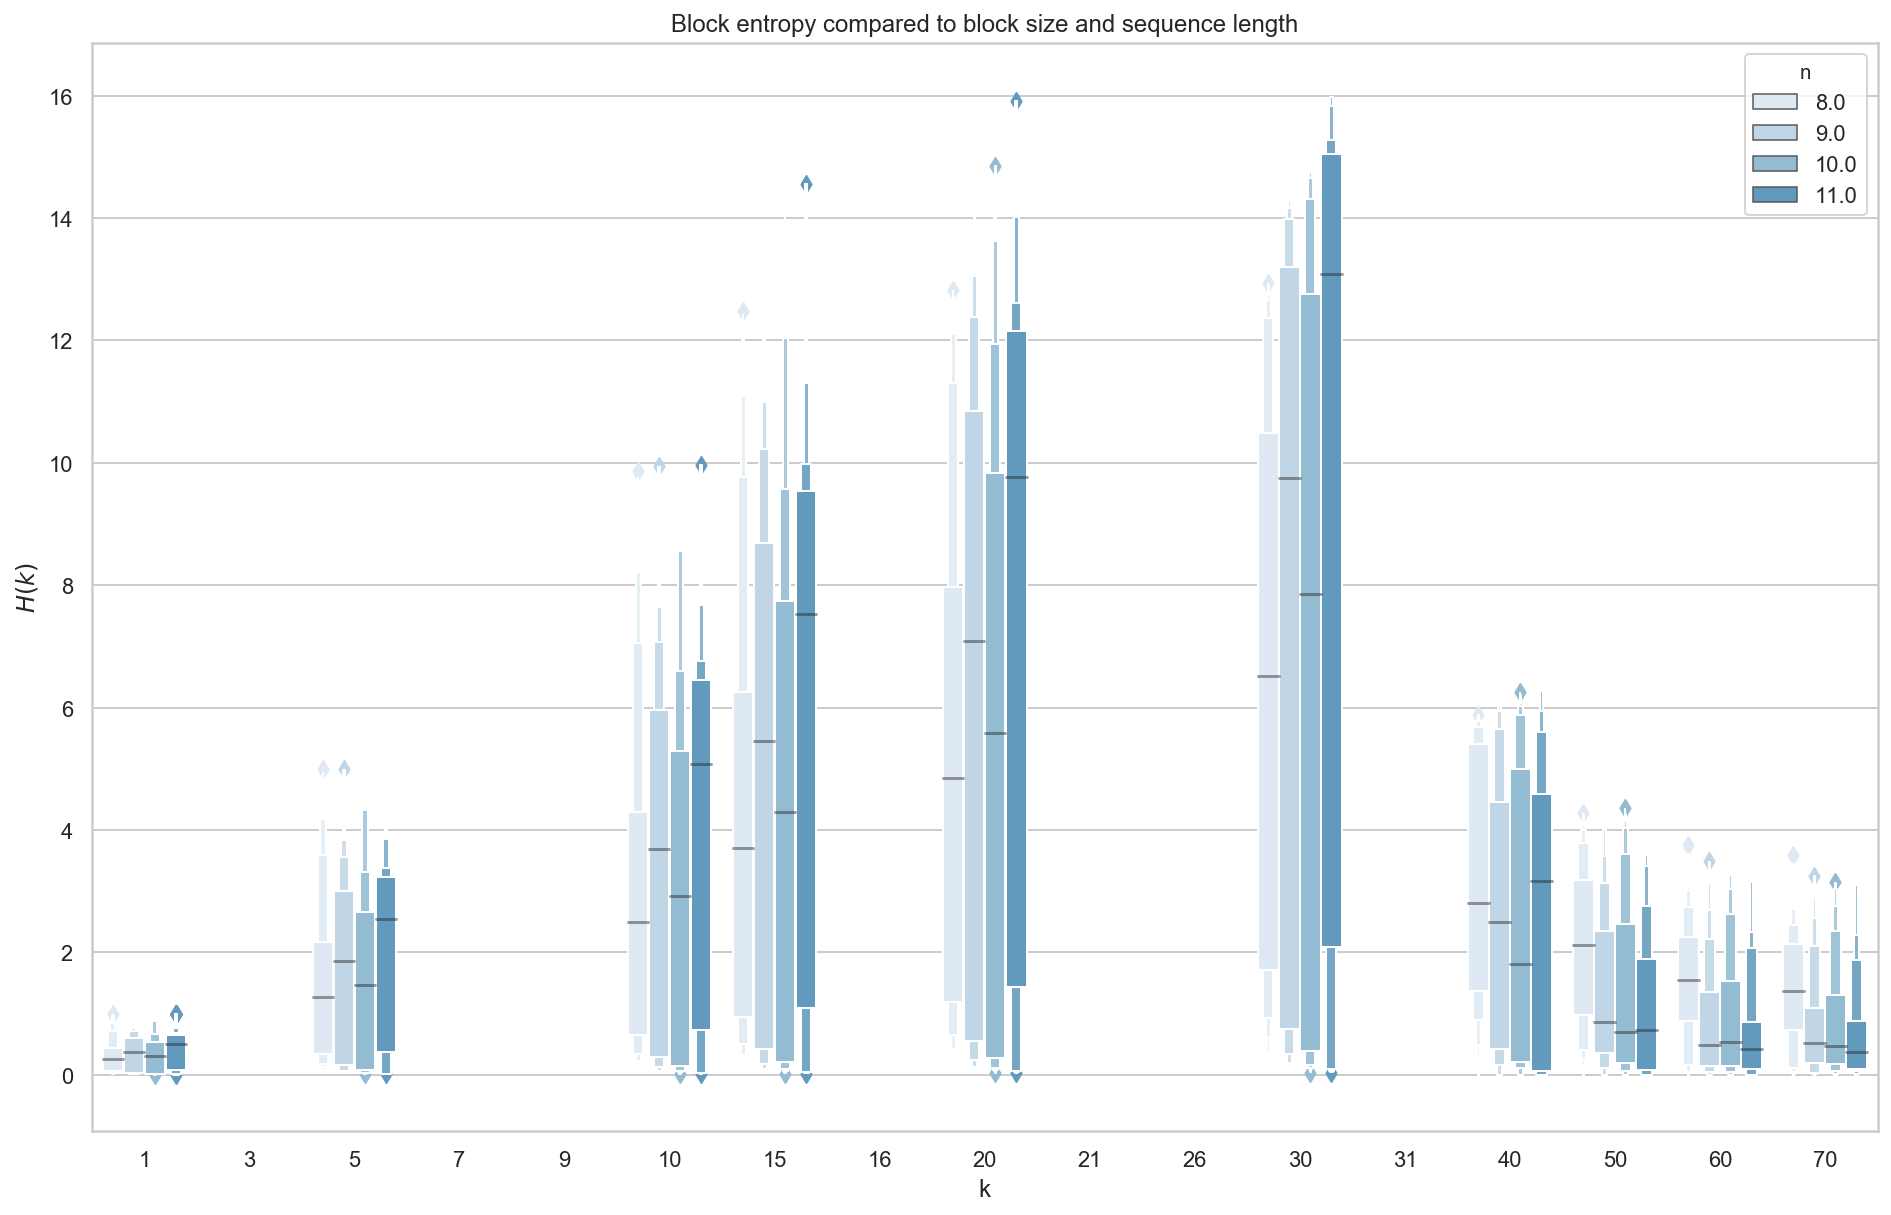

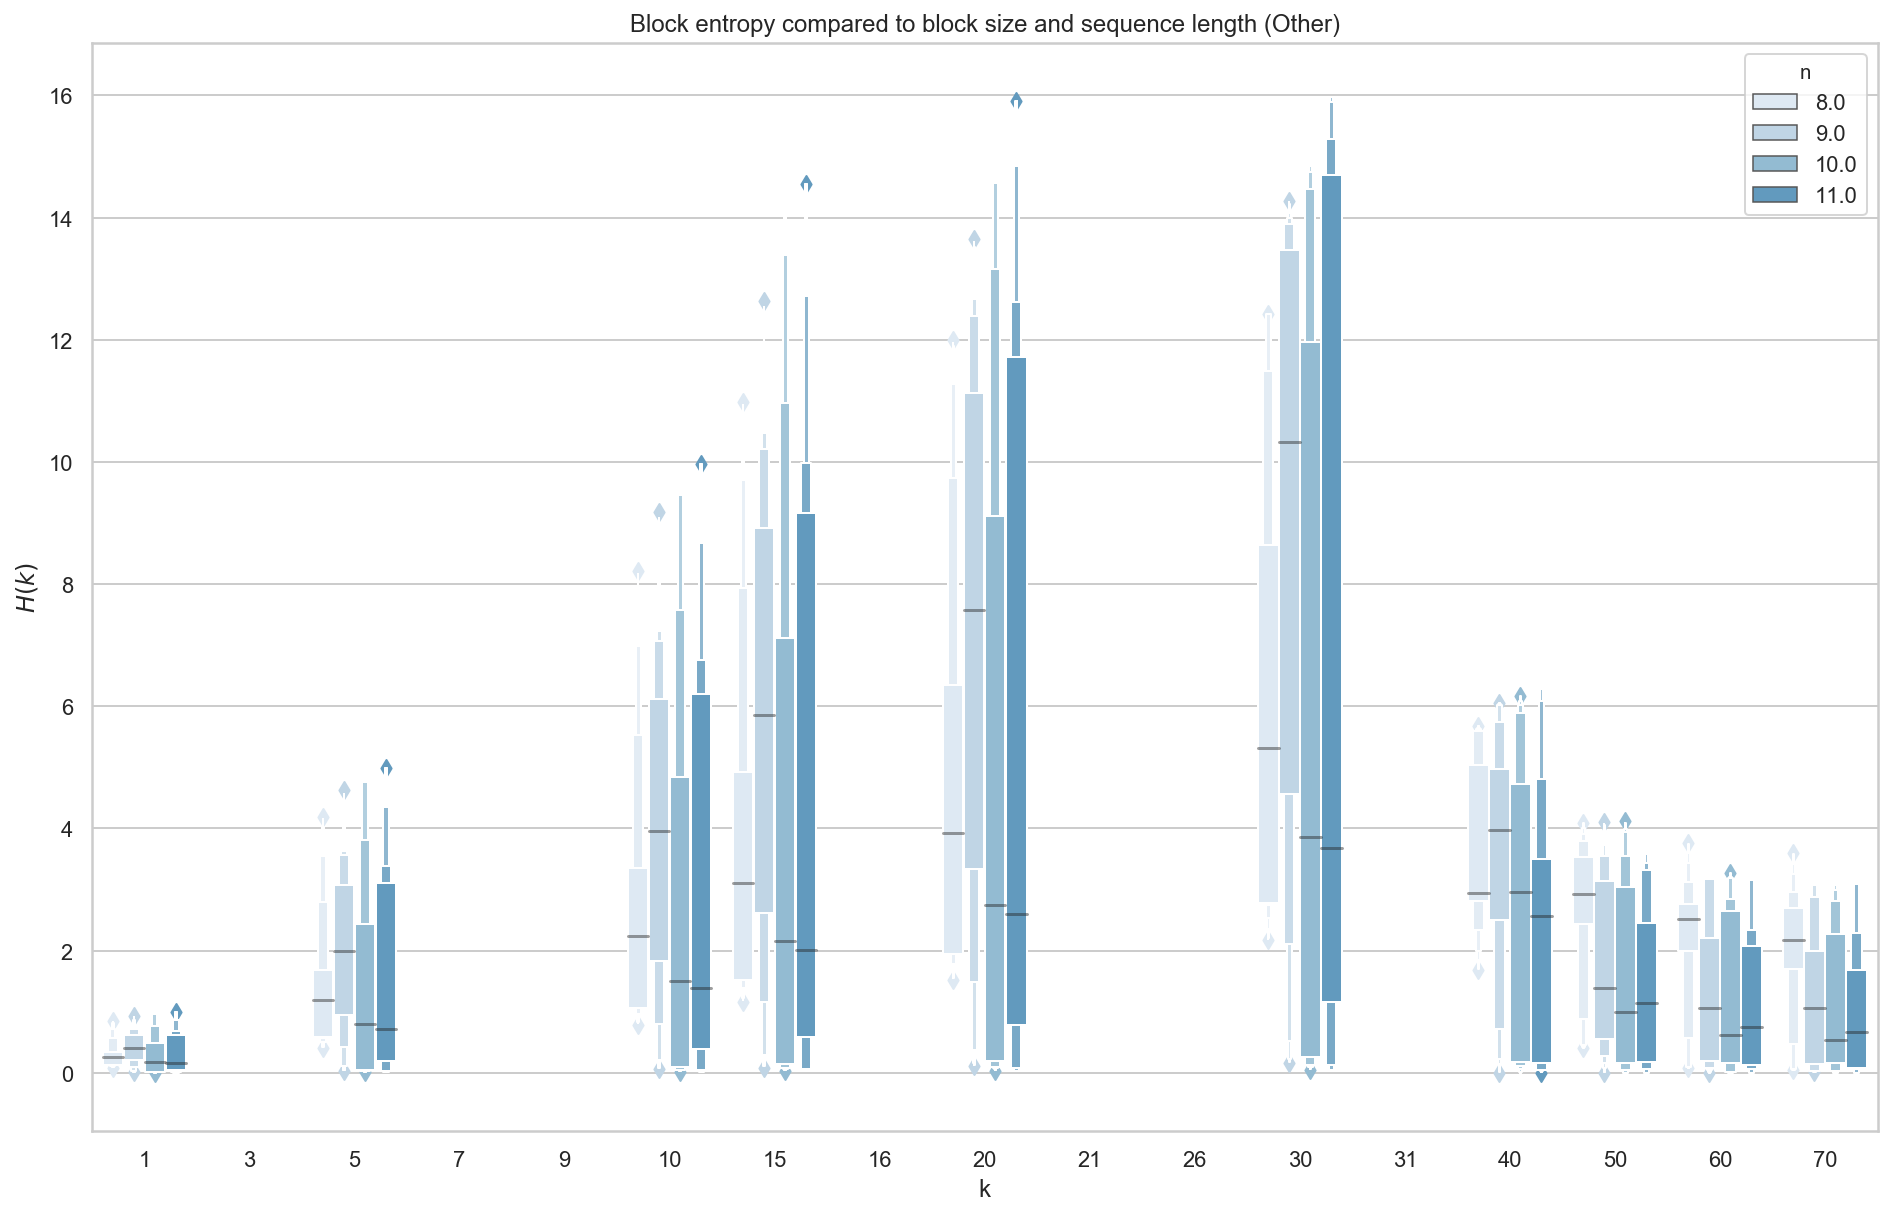

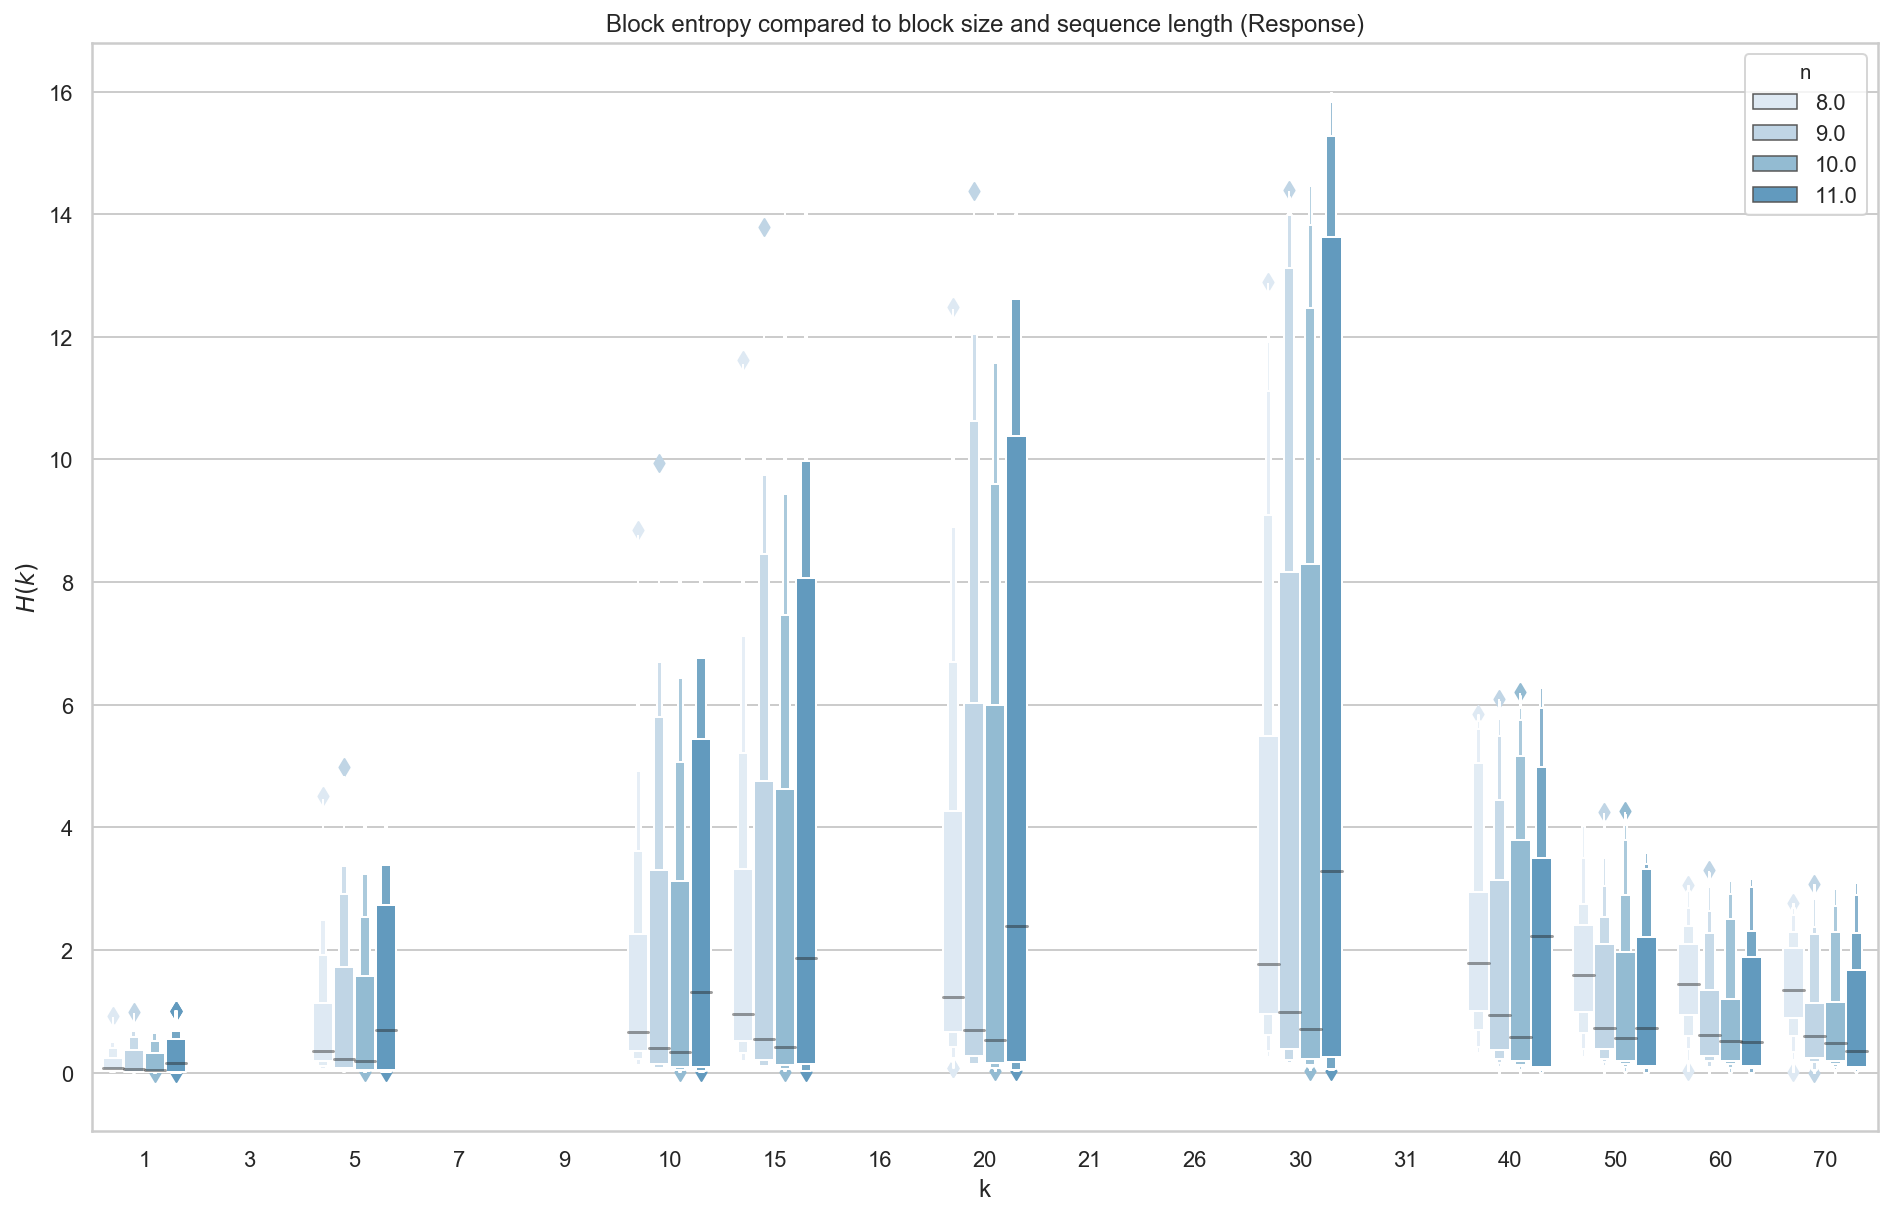

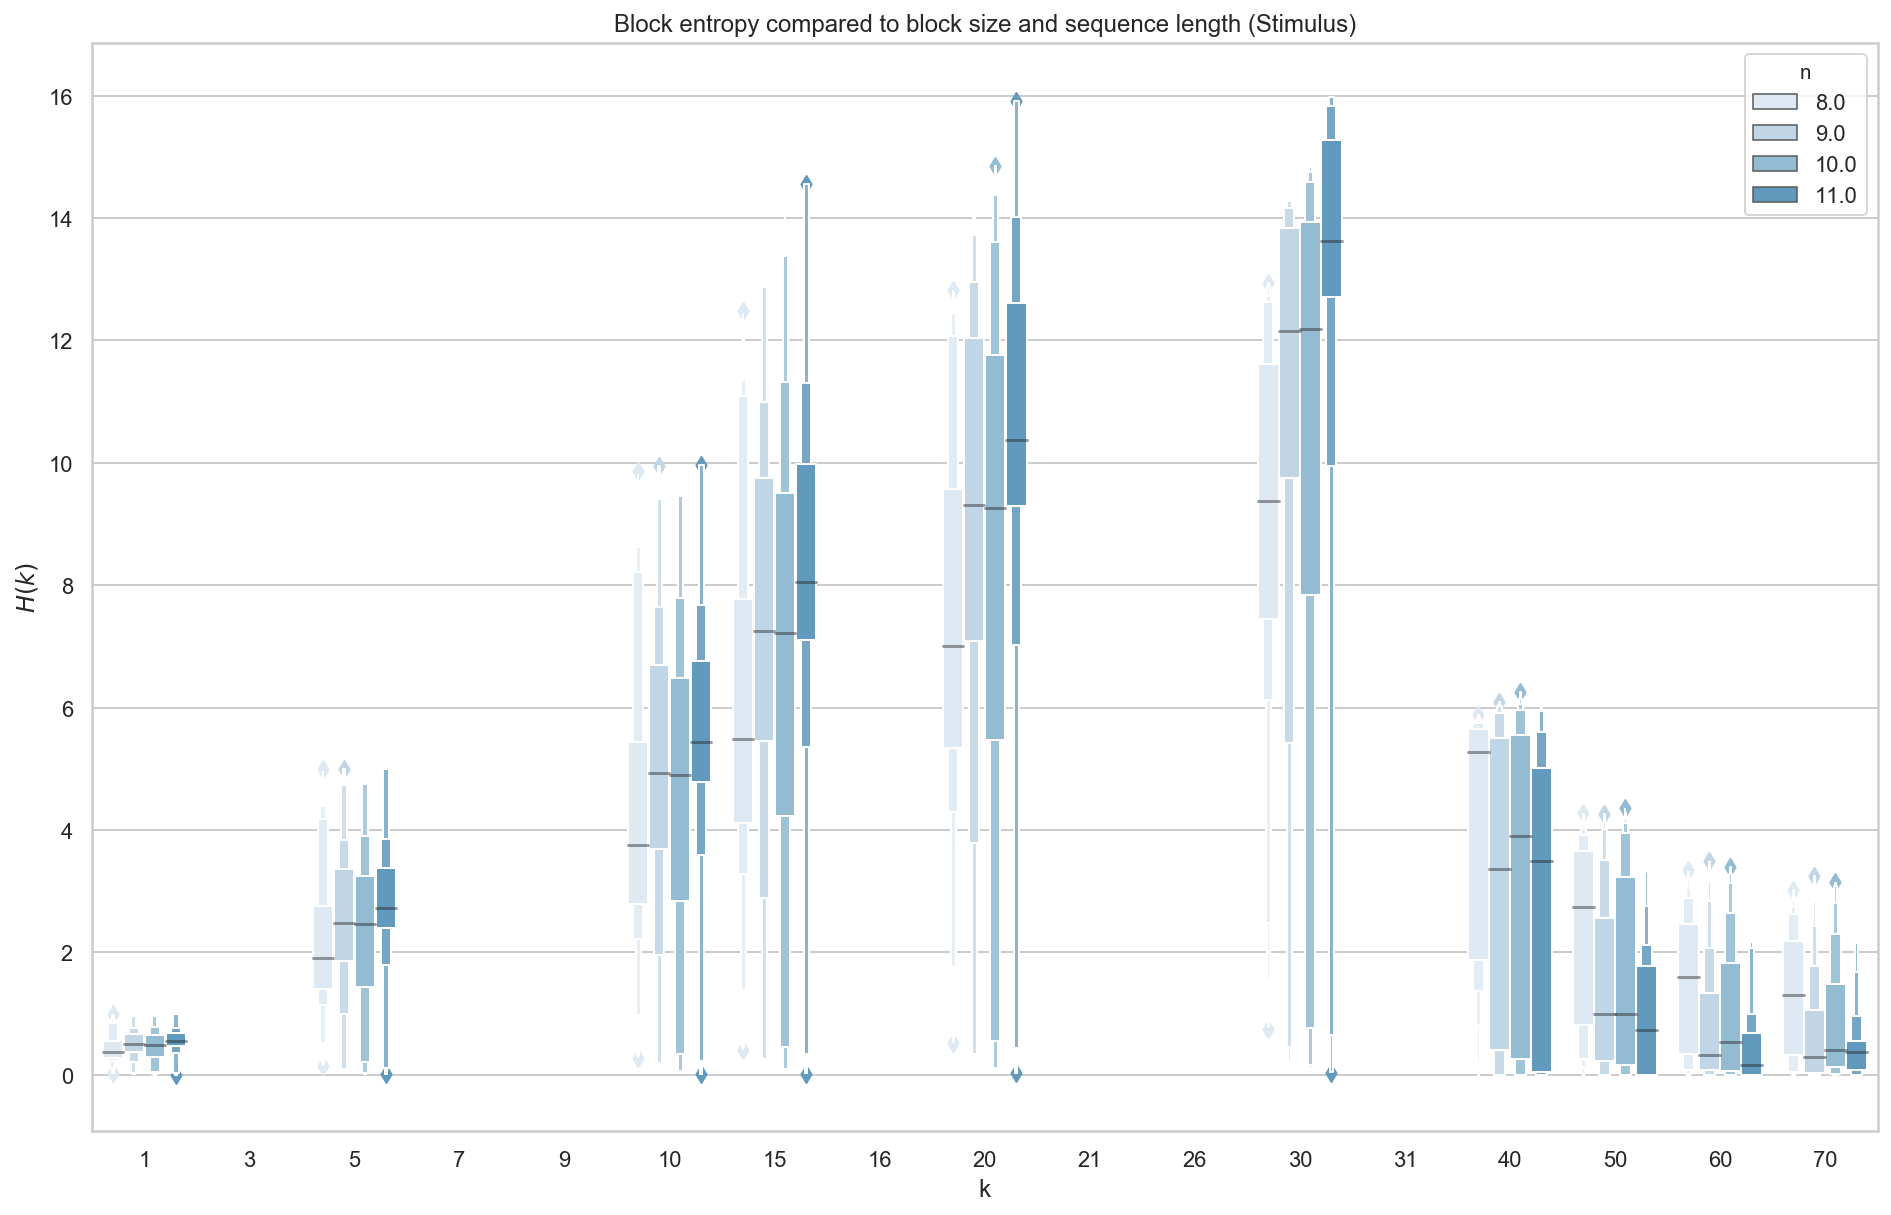

In [101]:
def plot_be_vs_k_grouped(data, groups):
    with sns.color_palette("Blues"):
        for cat, dg in data.groupby(groups):
            sns.boxenplot(data=dg, x='k', y=BLOCK_ENT, hue=np.floor(np.log(dg.n)))
            plt.title(f'Block entropy compared to block size and sequence length ({cat})')
            plt.show()
            
def plot_be_vs_k(data):
    with sns.color_palette("Blues"):
        sns.boxenplot(data=data, x='k', y=BLOCK_ENT, hue=np.floor(np.log(data.n)))
        plt.title(f'Block entropy compared to block size and sequence length')
        plt.show()
        
plot_be_vs_k(df)
plot_be_vs_k_grouped(df, 'Category')

In [ ]:
def plot_be_vs_k(data, groups):
    with sns.color_palette("Blues"):
        for cat, dg in data.groupby('Category'):
            sns.boxenplot(data=data, x='k', y=BLOCK_ENT, hue=np.floor(np.log(data.n)))
            plt.title(f'Block entropy compared to block size and sequence length ({cat})')
            plt.show()
        
plot_be_vs_k(df, None)

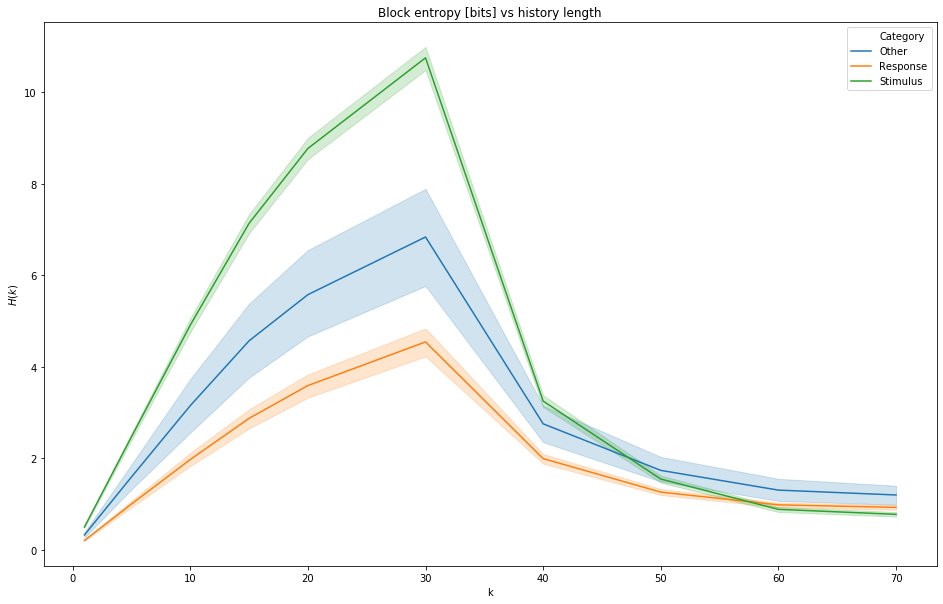

In [67]:
#fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
sns.lineplot(data=df, x='k', y=BLOCK_ENT, hue='Category')
plt.title('Block entropy [bits] vs history length')
plt.show()

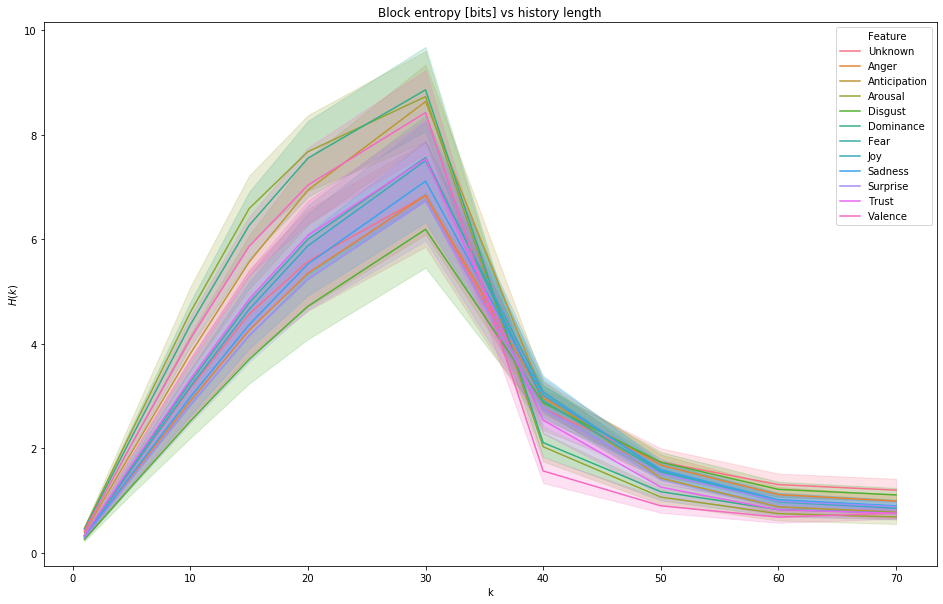

In [63]:
sns.lineplot(data=df, x='k', y=BLOCK_ENT, hue='Feature')
plt.title('Block entropy [bits] vs history length')
plt.show()

In [64]:
dflim = df[df.k == df.k.max()].sort_values(by=ENT_RATE, ascending=False)
dflim

$H(k)$  \
Document                                         Subject               
EN_1771_Mackenzie,Henry_TheManofFeeling_Novel    NARRATOR   3.591252   
EN_1798_Brown,CharlesBrockden_Wieland_Novel      carwin     3.253016   
                                                 brother    3.234385   
                                                 NARRATOR   3.181756   
                                                 READER     3.181756   
...                                                              ...   
EN_1778_Burney,Fanny_Evelina_Novel               ma'am      0.000000   
                                                 ma'am      0.000000   
EN_1811_Austen,Jane_SenseandSensibility_Novel    NARRATOR   0.000000   
EN_1804_Opie,Amelia_AdelineMowbray_Novel         adeline's  0.000000   
EN_1799_Brown,CharlesBrockden_ArthurMervyn_Novel justice    0.000000   

                                                            Category  Feature  \
Document                                         Subject                        
EN_1771_Mackenzie,Henry_TheManofFeeling_Novel    NARRATOR      Other  Unknown   
EN_1798_Brown,CharlesBrockden_Wieland_Novel      carwin     Stimulus  Disgust   
                                                 brother    Stimulus  Disgust   
                                                 NARRATOR   Stimulus  Disgust   
                                                 READER     Stimulus  Disgust   
...                                                              ...      ...   
EN_1778_Burney,Fanny_Evelina_Novel               ma'am      Response  Valence   
                                                 ma'am      Stimulus  Arousal   
EN_1811_Austen,Jane_SenseandSensibility_Novel    NARRATOR   Stimulus  Arousal   
EN_1804_Opie,Amelia_AdelineMowbray_Novel         adeline's  Stimulus  Arousal   
EN_1799_Brown,CharlesBrockden_ArthurMervyn_Novel justice    Stimulus     Fear   

                                                             k        n  \
Document                                         Subject                  
EN_1771_Mackenzie,Henry_TheManofFeeling_Novel    NARRATOR   70   6534.0   
EN_1798_Brown,CharlesBrockden_Wieland_Novel      carwin     70  15062.0   
                                                 brother    70  15062.0   
                                                 NARRATOR   70  15062.0   
                                                 READER     70  15062.0   
...                                                         ..      ...   
EN_1778_Burney,Fanny_Evelina_Novel               ma'am      70  30226.0   
                                                 ma'am      70  30226.0   
EN_1811_Austen,Jane_SenseandSensibility_Novel    NARRATOR   70  21509.0   
EN_1804_Opie,Amelia_AdelineMowbray_Novel         adeline's  70  19366.0   
EN_1799_Brown,CharlesBrockden_ArthurMervyn_Novel justice    70  27627.0   

                                                            $h^{(k)}$  \
Document                                         Subject                
EN_1771_Mackenzie,Henry_TheManofFeeling_Novel    NARRATOR    0.051304   
EN_1798_Brown,CharlesBrockden_Wieland_Novel      carwin      0.046472   
                                                 brother     0.046206   
                                                 NARRATOR    0.045454   
                                                 READER      0.045454   
...                                                               ...   
EN_1778_Burney,Fanny_Evelina_Novel               ma'am       0.000000   
                                                 ma'am       0.000000   
EN_1811_Austen,Jane_SenseandSensibility_Novel    NARRATOR    0.000000   
EN_1804_Opie,Amelia_AdelineMowbray_Novel         adeline's   0.000000   
EN_1799_Brown,CharlesBrockden_ArthurMervyn_Novel justice     0.000000   

                                                            $\eta^{(k)}$  \
Document                                         Subject             

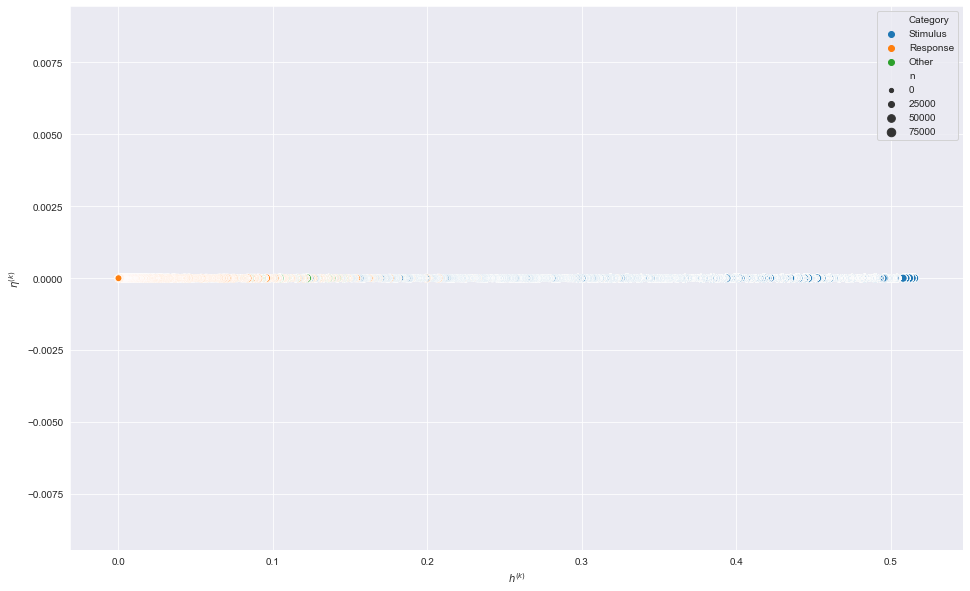

In [54]:
sns.scatterplot(data=dflim[dflim.reliability == 'Reliable'], x=ENT_RATE, y=EXCESS_ENT, hue='Category', size='n')

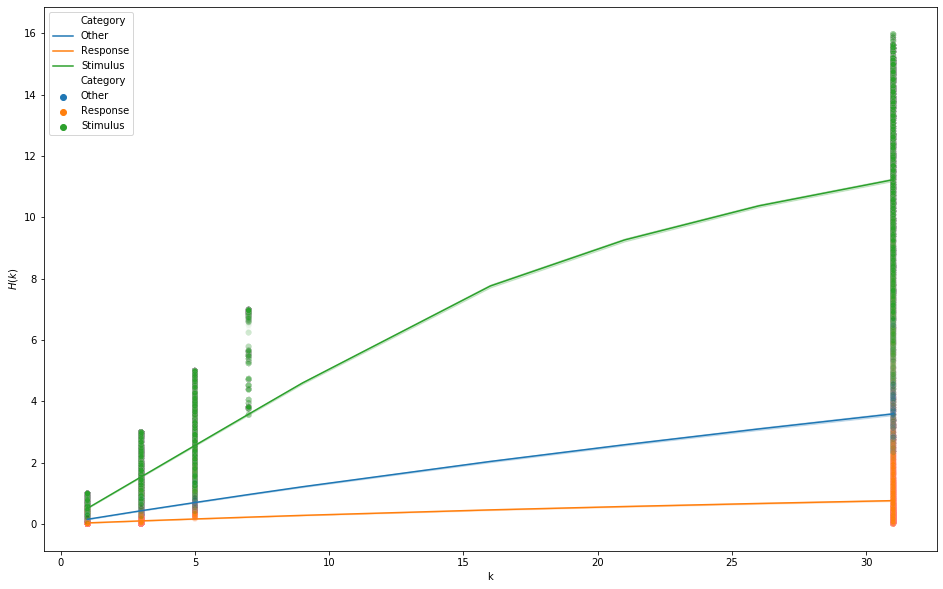

In [42]:
sns.lineplot(data=df, x='k', y=BLOCK_ENT, hue='Category')
sns.scatterplot(data=df[reliable], x='k', y=BLOCK_ENT, hue='Category', alpha=.02)

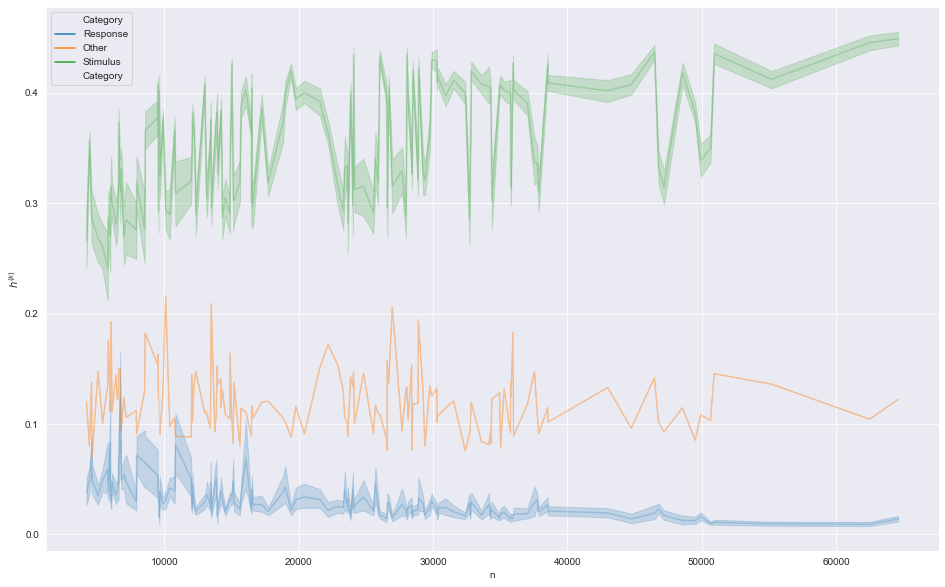

In [49]:
reliable_lim = dflim.reliability == 'Reliable'
sns.set_style("darkgrid")
sns.lineplot(data=dflim[reliable_lim], x='n', y=ENT_RATE, hue='Category', alpha=.25)
sns.lineplot(data=dflim[~reliable_lim], x='n', y=ENT_RATE, hue='Category', alpha=.025)
#sns.lineplot(data=dflim[reliable_lim], x='n', y=ENT_RATE, hue='Category', alpha=.25)

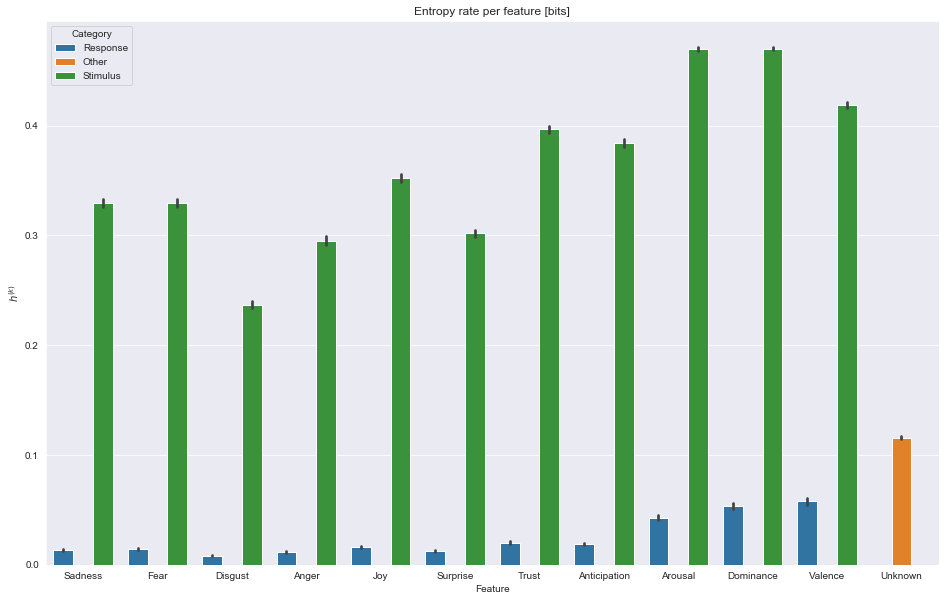

In [44]:
plt.title('Entropy rate per feature [bits]')
sns.barplot(data=dflim, x='Feature', y=ENT_RATE, hue='Category')

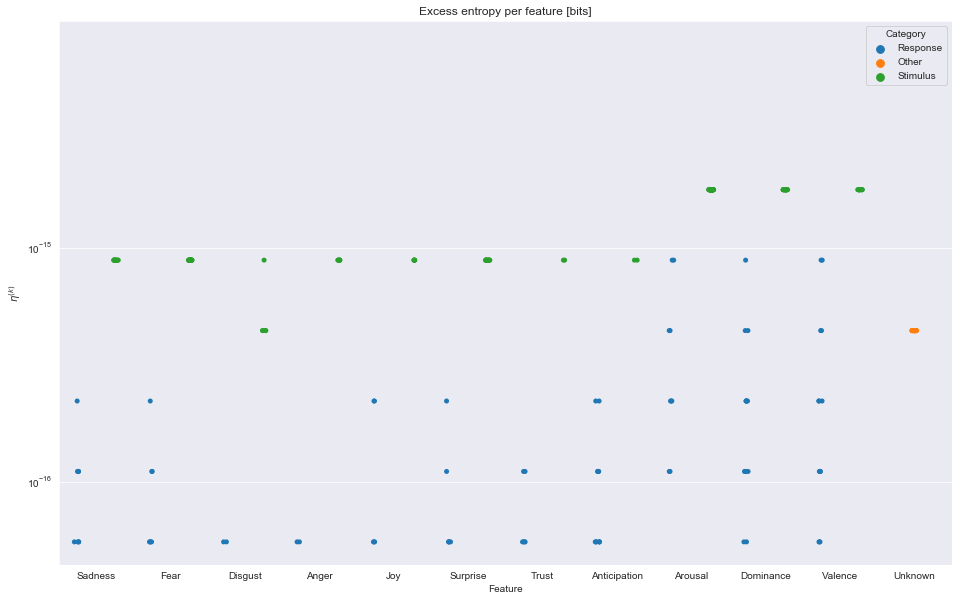

In [45]:
plt.title('Excess entropy per feature [bits]')
plt.yscale('log')
sns.stripplot(data=dflim, x='Feature', y=EXCESS_ENT, hue='Category', dodge=True, jitter=True)

In [223]:
wtfnames = ['Xidx',
'SSubject',
'FOther',
'FUnknown',
'n',
'k',
BLOCK_ENT,
'FResponse',
'FAnger',
'FAnticipation',
'FArousal',
'FDisgust',
'FDominance',
'FFear',
'FJoy',
'FSadness',
'FSurprise',
'FTrust',
'FValence',
'FStimulus',
'SREADER']
tmpdfs = [pd.read_csv(f) for f in DATA_ROOT.glob('**/*.csv')]
tmpdfs = [d[['n','k','be']] for d in tmpdfs if {'n','k','be'}.issubset(set(d.columns))]

In [235]:
tmpdf = pd.concat(tmpdfs, ignore_index=True, sort=True).rename(index=str, columns={'be': BLOCK_ENT})
tmpdf

$H(k)$   k      n
0       0.207817   1   6603
1       0.932323   5   6599
2       1.761592  10   6594
3       2.516922  15   6589
4       3.230813  20   6584
...          ...  ..    ...
48755  14.277407  30  21549
48756   0.000000  40  21539
48757   0.000000  50  21529
48758   0.000000  60  21519
48759   0.005890  70  21509

[48760 rows x 3 columns]

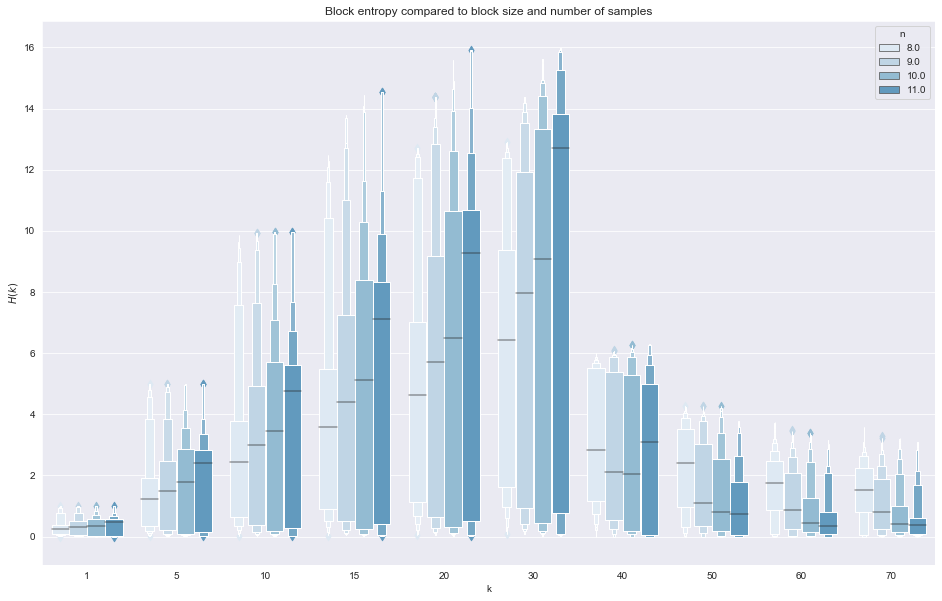

In [237]:
with sns.color_palette("Blues"):
    plt.title('Block entropy compared to block size and number of samples')
    sns.boxenplot(data=tmpdf, x='k', y=BLOCK_ENT, hue=np.floor(np.log(tmpdf.n)))